All files available from [this github repo](https://github.com/AJB0211/bandcamp_scraping)

In [5]:
from BandcampSpider import AlbumSpider, ProfileSpider, FrontPageSpider
from IPython.display import IFrame
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [9]:
tearing_URL = "https://we-deserve-this.bandcamp.com/album/tearing"
IFrame(src=tearing_URL,width=1000,height=1000)

# AlbumSpider

This library is composed of 3 main `Spiders` at present time inheriting from a base class. The `AlbumSpider` performs the core functionality of scraping details off an album listing. Relevant quantities can be accessed through various getters.

In [3]:
tearing = AlbumSpider(tearing_URL,logfile="./demoResources/out/albumLog.txt")
tearingDetails = tearing.getAlbumDetails()
_ = tearing.getReviews()
_ = tearing.getSupporters()

In [4]:
for i, j in tearing.getAsDict().items():
    print(f'{i} : {j}')

albumTitle : Tearing
bandName : We Deserve This
label : We Deserve This
price : $5
tags : ['electronic', 'experimental', 'idm', 'metal', 'rock', 'breakbeat', 'dance', 'downtempo', 'electro', 'electronica', 'experimental electronic', 'instrumental', 'post-metal', 'post-rock', 'Germany']
songs : [{'track': 1, 'title': 'Zauber', 'duration': 240.0}, {'track': 2, 'title': 'Tearing', 'duration': 221.0}, {'track': 3, 'title': 'Clear', 'duration': 234.0}, {'track': 4, 'title': 'Halo', 'duration': 256.0}]
totalDuration : 951.0
releaseDate : 20171027
reviews : anoNYMous Raven:::::NULL:::::We Deserve This is always dependably awesome. Some of the best shit the already dependable Fluttery Records has to offer. A wide array of genres and talents offers the best of the best in electronic instrumentals, neoclassical music, post-rock, and even a little metal. You will not be disappointed!
supporters : https://bandcamp.com/theladyanonymous,https://bandcamp.com/daviddudson,https://bandcamp.com/marzia,ht

In [5]:
del tearing

Getters returns copies in most cases meaning they will survive deletion of the class that was used to harvest the information.

In [6]:
tearingDetails

{'albumTitle': 'Tearing',
 'bandName': 'We Deserve This',
 'label': 'We Deserve This',
 'price': '$5',
 'tags': ['electronic',
  'experimental',
  'idm',
  'metal',
  'rock',
  'breakbeat',
  'dance',
  'downtempo',
  'electro',
  'electronica',
  'experimental electronic',
  'instrumental',
  'post-metal',
  'post-rock',
  'Germany'],
 'songs': [{'track': 1, 'title': 'Zauber', 'duration': 240.0},
  {'track': 2, 'title': 'Tearing', 'duration': 221.0},
  {'track': 3, 'title': 'Clear', 'duration': 234.0},
  {'track': 4, 'title': 'Halo', 'duration': 256.0}],
 'totalDuration': 951.0,
 'releaseDate': '20171027'}

Some exception handling is performed to check that the URL is in the [bandcamp.com](https://bandcamp.com/) domain and that the page being pointed at is an album listing.

In [7]:
AlbumSpider("www.google.com")

DomainError: Not in the Bandcamp domain

In [8]:
AlbumSpider("www.bandcamp.com")

WebDriverException: Message: unknown error: unhandled inspector error: {"code":-32000,"message":"Cannot navigate to invalid URL"}
  (Session info: chrome=74.0.3729.131)
  (Driver info: chromedriver=74.0.3729.6 (255758eccf3d244491b8a1317aa76e1ce10d57e9-refs/branch-heads/3729@{#29}),platform=Linux 5.0.10-050010-generic x86_64)


# FrontPageSpider

This `Spider` uses the front page as a point of access to locate albums to be fed into `AlbumSpiders`. The target of this is a "discovery" box on the front page of the website.

In [10]:
IFrame(src="https://bandcamp.com/?g=rock&s=top&p=0&gn=0&f=all&w=0",width=1000,height=1000)

In [2]:
FrontPageSpider.getCategoryOptions()

['top', 'new', 'rec']

In [3]:
FrontPageSpider.getGenreOptions()

['electronic',
 'rock',
 'metal',
 'alternative',
 'hip-hop-rap',
 'experimental',
 'punk',
 'folk',
 'pop',
 'ambient',
 'soundtrack',
 'world',
 'jazz',
 'acoustic',
 'funk',
 'r-b-soul',
 'devotional',
 'classical',
 'reggae',
 'podcasts',
 'country',
 'spoken-word',
 'comedy',
 'blues',
 'kids',
 'audiobooks',
 'latin']

In [4]:
tempFPS = FrontPageSpider(genres = ["rock"],categories=["top"],
                                      logfile="./demoResources/out/tempFrontLog.txt")

In [5]:
tempFPS.getURLs(pageLimit=5,pageSleepTime=0.05,pageWaitTime=1, reset=True)

{'rock': {'top': ['https://chriscohen.bandcamp.com/album/calamity-the-curtains',
   'https://wearesnooze.bandcamp.com/album/familiaris',
   'https://comeswiththefall.bandcamp.com/album/beyond-the-last-light',
   'https://comeswiththefall.bandcamp.com/album/the-reckoning-ep',
   'https://chipmunkson16speed.bandcamp.com/album/vol-1',
   'https://spotlights.bandcamp.com/album/love-decay',
   'https://humdrums.bandcamp.com/album/vol-iii',
   'https://priests.bandcamp.com/album/the-seduction-of-kansas',
   'https://filthyfriends.bandcamp.com/album/emerald-valley',
   'https://pile.bandcamp.com/album/green-and-gray',
   'https://introitus.bandcamp.com/album/shadows',
   'http://shop.alonasdreamrecords.com/album/what-we-want-is-free',
   'https://dacaptaintrips.bandcamp.com/album/rocknroll-summer-camp-vol-1',
   'https://davidnance.bandcamp.com/album/catharsis-lottery-live-2018-2019',
   'https://pyramidalmusic.bandcamp.com/album/pyramidal',
   'https://covetband.bandcamp.com/album/effloresce

All `Spider` classes support conversion methods to `pandas` objects. `FrontPageSpider` instances convert to `DataFrame` while `AlbumSpider` and `ProfileSpider` instances convert to `Series` for concatenation.

In [6]:
tempFPS.asDataFrame().head()

,genre,category,url
0,rock,top,https://chriscohen.bandcamp.com/album/calamity...
1,rock,top,https://wearesnooze.bandcamp.com/album/familiaris
2,rock,top,https://comeswiththefall.bandcamp.com/album/be...
3,rock,top,https://comeswiththefall.bandcamp.com/album/th...
4,rock,top,https://chipmunkson16speed.bandcamp.com/album/...


In [7]:
tempFPS.to_csv("./demoResources/out/FPS.csv")

In [8]:
del tempFPS

In [9]:
!cat "./demoResources/out/FPS.csv"

genre,category,url
rock,top,https://chriscohen.bandcamp.com/album/calamity-the-curtains
rock,top,https://wearesnooze.bandcamp.com/album/familiaris
rock,top,https://comeswiththefall.bandcamp.com/album/beyond-the-last-light
rock,top,https://comeswiththefall.bandcamp.com/album/the-reckoning-ep
rock,top,https://chipmunkson16speed.bandcamp.com/album/vol-1
rock,top,https://spotlights.bandcamp.com/album/love-decay
rock,top,https://humdrums.bandcamp.com/album/vol-iii
rock,top,https://priests.bandcamp.com/album/the-seduction-of-kansas
rock,top,https://filthyfriends.bandcamp.com/album/emerald-valley
rock,top,https://pile.bandcamp.com/album/green-and-gray
rock,top,https://introitus.bandcamp.com/album/shadows
rock,top,http://shop.alonasdreamrecords.com/album/what-we-want-is-free
rock,top,https://dacaptaintrips.bandcamp.com/album/rocknroll-summer-camp-vol-1
rock,top,https://davidnance.bandcamp.com/album/catharsis-lottery-live-2018-2019
rock,top,https://pyramidalmusic.bandcamp.com/album/pyramidal
ro

## What do you find on Bandcamp?

Here we look at what genres are most popular on Bandcamp

In [ ]:
## Uncomment and run this script if the following CSV is not available
## Such as if this library was obtained from github.

# import demoFrontPage

In [2]:
frontPageResults = pd.read_csv("./demoResources/demoFrontPage.csv")
frontPageResults.head()

,genre,category,url
0,electronic,top,https://joshuamorse.bandcamp.com/album/power-s...
1,electronic,top,https://spunoutofcontrol.bandcamp.com/album/ream
2,electronic,top,https://sidewalksandskeletons.bandcamp.com/alb...
3,electronic,top,https://midwestcollective.bandcamp.com/album/o...
4,electronic,top,https://headlesshorsemanberlin.bandcamp.com/al...


In [3]:
frontPageResults.genre.value_counts()

rock            160
jazz            160
hip-hop-rap     160
acoustic        160
electronic      160
funk            160
reggae          160
world           160
r-b-soul        160
ambient         160
alternative     160
folk            160
soundtrack      160
pop             160
experimental    160
metal           160
punk            160
classical       132
devotional      125
country          92
blues            73
comedy           49
spoken-word      31
Name: genre, dtype: int64

We are looking at popular genres so we ignore those that do not have at least 20 pages worth of results. For time constraints we limit the search to 25 items per genre.

Additionally, we truncate how many supporters are scraped per album because some very popular albums have very many supporters.

In [8]:
frontPageSample = frontPageResults.groupby("genre").filter(lambda x: len(x) > 150).groupby("genre").head(25)

,genre,category,url
0,electronic,top,https://joshuamorse.bandcamp.com/album/power-s...
1,electronic,top,https://spunoutofcontrol.bandcamp.com/album/ream
2,electronic,top,https://sidewalksandskeletons.bandcamp.com/alb...
3,electronic,top,https://midwestcollective.bandcamp.com/album/o...
4,electronic,top,https://headlesshorsemanberlin.bandcamp.com/al...
5,electronic,top,https://themidnight.bandcamp.com/album/kids
6,electronic,top,https://fearofdark.bandcamp.com/album/motorway
7,electronic,top,https://pinkman.bandcamp.com/album/my-master-p...
8,electronic,top,https://waveshaper1.bandcamp.com/album/artifact
9,electronic,top,https://sidewalksandskeletons.bandcamp.com/alb...


In [16]:
exURL = frontPageSample.iloc[0,2]
IFrame(src=exURL,width=1000,height=600)

In [17]:
exAlbum = AlbumSpider(exURL,logfile="./demoResources/out/albumLog.txt")
len(exAlbum.getSupporters())
del exAlbum

18

In [20]:
frontPageSample.shape

(3222, 3)

In [12]:
popGenres = pd.read_csv("./demoResources/supporterCounts.csv").drop(["Unnamed: 0"],axis=1)
popGenres.head()

,genre,url,supporter count
0,electronic,https://joshuamorse.bandcamp.com/album/power-s...,18
1,electronic,https://spunoutofcontrol.bandcamp.com/album/ream,34
2,electronic,https://sidewalksandskeletons.bandcamp.com/alb...,1076
3,electronic,https://midwestcollective.bandcamp.com/album/o...,1873
4,electronic,https://headlesshorsemanberlin.bandcamp.com/al...,16


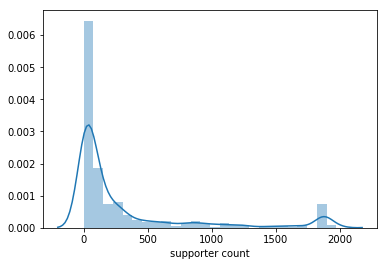

In [13]:
sns.distplot(popGenres["supporter count"])

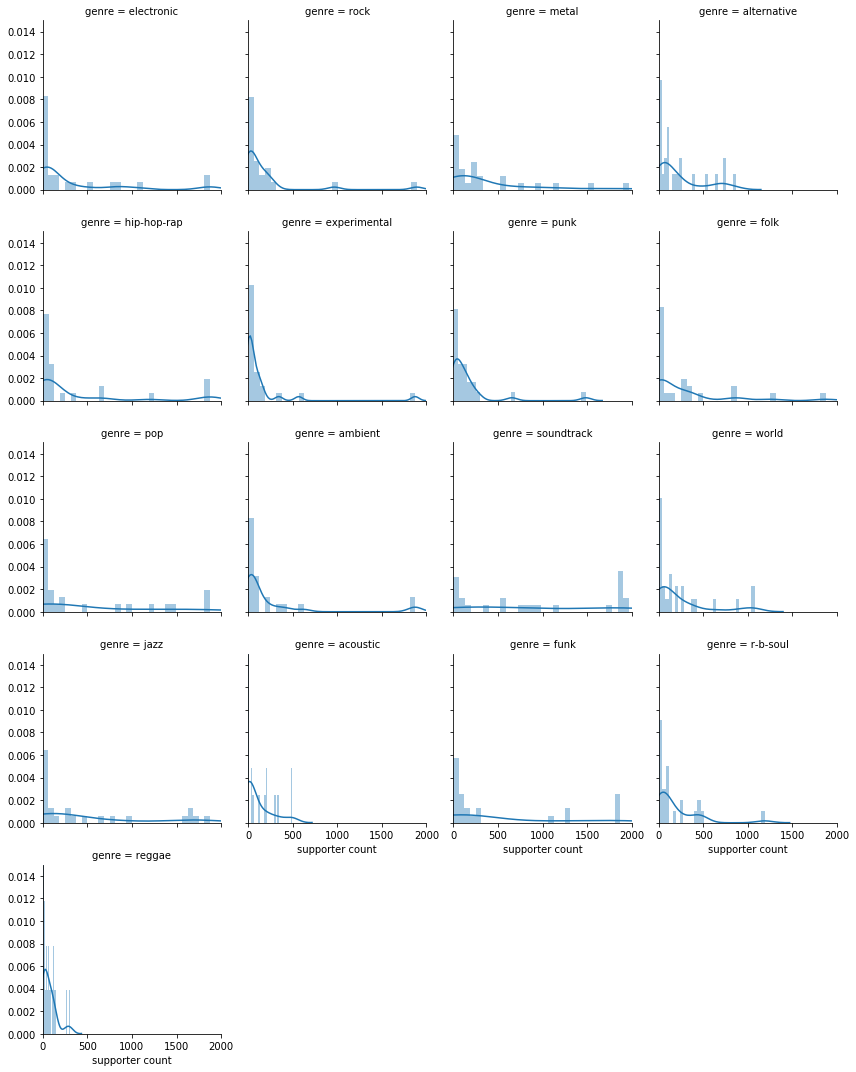

In [23]:
genreGrid = sns.FacetGrid(popGenres,col="genre",col_wrap=4,height=3,xlim=(0,2000),ylim=(0,0.015))
genreGrid.map(sns.distplot,"supporter count",bins=30)

In [36]:
(popGenres.groupby("genre").agg({"supporter count": ["sum","mean","std"]})
          .sort_values(("supporter count","sum"),ascending=False))

supporter count                    
                         sum    mean         std
genre                                           
soundtrack             23396  935.84  788.082307
pop                    12903  516.12  689.461585
jazz                   12879  515.16  656.107377
funk                   12702  508.08  714.832260
metal                   9592  383.68  521.129920
hip-hop-rap             9454  378.16  628.027446
electronic              8489  339.56  550.367156
folk                    7274  290.96  465.138195
ambient                 6320  252.80  511.303644
world                   6168  246.72  325.583133
alternative             5665  226.60  264.085371
rock                    4768  190.72  405.748436
r-b-soul                4515  180.60  262.584272
punk                    4121  164.84  308.444171
experimental            3807  152.28  380.362165
acoustic                2589  103.56  154.515123
reggae                  1749   69.96   79.856893

# ProfileSpider
This `Spider`, once pointed at a user profile, collects some information but is largely used to gathes URLs of the items in that user's collection.

In [38]:
# We look at the profile of some user with a small collection for speed
profileURL = "https://bandcamp.com/natoryous"
IFrame(src=profileURL,width=1000,height=600)

In [41]:
profileDemo = ProfileSpider(profileURL, logfile="./demoResources/out/profileLog.txt")

for i in profileDemo.getCollection():
    print(i)
    
profileSeries = profileDemo.asPandasSeries()
    
del profileDemo

https://waveshaper1.bandcamp.com/album/artifact
https://injekted.bandcamp.com/album/g-e-o-ost
https://injekted.bandcamp.com/track/fractal-zooms
https://injekted.bandcamp.com/album/compounds-ep
https://injekted.bandcamp.com/album/neutron-ep
https://injekted.bandcamp.com/album/sweezy-gunner-ost
https://jamatar.bandcamp.com/album/journeys
https://music.biggiantcircles.com/album/hive-jump
https://jamatar.bandcamp.com/album/spacesounds-4
https://shirobon.bandcamp.com/album/infinity
https://alexanderbrandon.bandcamp.com/album/earthscape
https://alexanderbrandon.bandcamp.com/album/just-fun
https://erioofficial.bandcamp.com/album/trial-error
https://erioofficial.bandcamp.com/album/destruction-liberation-ep
https://erioofficial.bandcamp.com/track/luna
https://erioofficial.bandcamp.com/track/monolith


In [44]:
print(profileSeries.head())
print(profileSeries.collection)

username          Andy
collectionSize      16
wishlistSize         8
followers            0
following           10
dtype: object
https://waveshaper1.bandcamp.com/album/artifact,https://injekted.bandcamp.com/album/g-e-o-ost,https://injekted.bandcamp.com/track/fractal-zooms,https://injekted.bandcamp.com/album/compounds-ep,https://injekted.bandcamp.com/album/neutron-ep,https://injekted.bandcamp.com/album/sweezy-gunner-ost,https://jamatar.bandcamp.com/album/journeys,https://music.biggiantcircles.com/album/hive-jump,https://jamatar.bandcamp.com/album/spacesounds-4,https://shirobon.bandcamp.com/album/infinity,https://alexanderbrandon.bandcamp.com/album/earthscape,https://alexanderbrandon.bandcamp.com/album/just-fun,https://erioofficial.bandcamp.com/album/trial-error,https://erioofficial.bandcamp.com/album/destruction-liberation-ep,https://erioofficial.bandcamp.com/track/luna,https://erioofficial.bandcamp.com/track/monolith


## Looking at the bias of a music reviewer

This is a cursory glance at the collection of a popular metal reviewer combining multiple elements of this library.

You can find this profile [here](https://bandcamp.com/angrymetalguy)

In [45]:
IFrame(src="http://www.angrymetalguy.com/",width=1000,height=600)

In [2]:
amgProfile = ProfileSpider.readSeries("./demoResources/amg.csv")
amgProfile.collection.split(",")

['https://acridnl.bandcamp.com/album/wonderland',
 'https://allfather1.bandcamp.com/album/and-all-will-be-desolation',
 'https://theaphelionofficial.bandcamp.com/album/the-labour-division',
 'https://austinwintory.bandcamp.com/album/the-banner-saga-3',
 'https://wilderun.bandcamp.com/album/sleep-at-the-edge-of-the-earth',
 'https://trials.bandcamp.com/album/this-ruined-world',
 'https://kinggoat.bandcamp.com/album/conduit',
 'https://aepochmetal.bandcamp.com/album/awakening-inception',
 'https://parius.bandcamp.com/album/the-eldritch-realm',
 'https://ledtothegrave.bandcamp.com/album/bane-of-existence',
 'https://mysilentwake1.bandcamp.com/album/there-was-death',
 'https://adavant.bandcamp.com/album/the-unyielding',
 'https://dirtyshirt.bandcamp.com/album/dirtylicious-2015',
 'https://helicaseofficial.bandcamp.com/album/the-roots-of-empty-space',
 'https://distances.bandcamp.com/album/diableries',
 'https://crowblacksky.bandcamp.com/album/sidereal-light-volume-one',
 'https://masterboo

In [4]:
amgTags = AlbumSpider.readSeries("./demoResources/amgTags.csv")
amgTags.head()

0
0             acrid
1    acrid metal nl
2          acrid nl
3       death metal
4          den haag
dtype: object

In [20]:
# could use pandas replace method but have had trouble with it in the past
def tagMap(i):
    temp = re.sub("(#)|(metal)|(rock)","",i)
    temp = re.sub(".*doom.*","doom",temp)
    temp = re.sub(".*folk.*","folk",temp)
    return temp.strip()

In [29]:
tags = amgTags.apply(lambda x: tagMap(x))
tags[tags != ""].value_counts().head(6)

death          28
progressive    24
black          19
folk           18
doom           17
thrash         13
dtype: int64

# Future Work:

 * Fix repo to clean up demo files
 * "The big scrape"
   + Recovery from failed scrape using error logs
   + Class to handle scrape logic such as URL hash map
   + Potentially change language of this project
 * "from_csv" method for reinstantiating classes
 * Handling multiple currency types for price field
 * Different sales formats
 * Wishlist scraping
 * More user details
 * Chromedriver has a known bug where pages aren't killed
 * Making sure deconstructor is called properly when exceptions are thrown, particularly DomainError
 * A new spider for band pages

In [14]:
IFrame(src="https://monoofjapan.bandcamp.com/",width=1000,height=600)